In [1]:
import os
from pathlib import Path
import json
from PIL import Image
import numpy as np
from typing import List
from tqdm import tqdm
import pandas as pd

In [2]:
from os.path import basename, dirname

# Crop family-sample face

## Data dictionary

In [3]:
from fpt.path import DICT, FACE, DTFR

### Open sample_file_dict

In [4]:
with open(DICT / "sample_file_dict.txt", "r") as f:
    sample_file_dict = json.load(f)

### Open sample_bbox_dict

In [5]:
with open(DICT / "sample_bbox_dict.txt", "r") as f:
    sample_bbox_dict = json.load(f)

## Main process

In [6]:
from fpt.path import get_face_target_path
from fpt.data import crop_faces, init_df_sample_face, create_face_series

### Crop faces

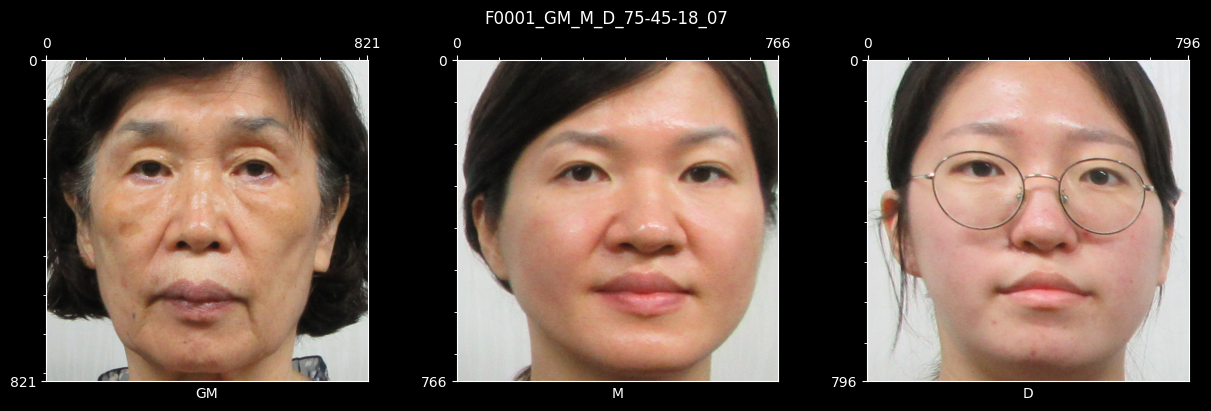

In [7]:
key = "F0001_GM_M_D_75-45-18_07"
value = sample_bbox_dict[key]
image_path = sample_file_dict[key]["image"]
_ = crop_faces(key, value, image_path, visualize=True)

In [8]:
DATA_CATEGORY = "aihub_sample"
df_sample_face = init_df_sample_face()
for key, value in tqdm(sample_bbox_dict.items()):
    image_path = sample_file_dict[key]["image"]
    out = crop_faces(key, value, image_path)
    classes = [r[0] for r in value]
    for sliced_array, c in zip(out, classes):
        target = get_face_target_path(key, c, category=DATA_CATEGORY)
        face_image = Image.fromarray(np.uint8(sliced_array))
        face_image.save(target)
        series = create_face_series(key, c, DATA_CATEGORY, target)
        df_sample_face.loc[target.stem] = series
        
df_sample_face.to_csv(DTFR / f"df_{DATA_CATEGORY}_face.csv", index_label='uuid')

100%|██████████| 258/258 [00:53<00:00,  4.86it/s]


### Flatten directory

In [9]:
from fpt.data import flatten_directory

In [10]:
flatten_directory(str(FACE), 'aihub_sample')

### face image path from series

In [12]:
from fpt.path import get_face_image_path_from_series

In [13]:
get_face_image_path_from_series(df_sample_face.iloc[0])

PosixPath('/home/jongphago/family-photo-tree/data/face-image/aihub_sample/0000/F0001/F0001-GM/9f966a26-3a0d-4e7f-90df-f3266365f7d9.jpg')